In [32]:
import csv
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [33]:
RANDOM_SEED = 42
Labels =  ['A','B','C','D','E','F','G','H','I','J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
NUM_CLASSES = len(Labels)

In [17]:
file_path = '/content/data.csv'
model_save_path = '/content/keypoint_classifier.hdf5'
tflite_save_path = '/content/keypoint_classifier.tflite'

In [18]:
dataset = pd.read_csv(file_path)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, 1:], dataset.iloc[:, 0], train_size=0.75, random_state=RANDOM_SEED)

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((X_train.shape[1], )),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [26]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=100, verbose=1)

In [27]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [28]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
242/245 [============================>.] - ETA: 0s - loss: 3.4663 - accuracy: 0.3842
Epoch 1: saving model to /content/keypoint_classifier.hdf5
245/245 [==============================] - 4s 11ms/step - loss: 3.4411 - accuracy: 0.3865 - val_loss: 0.9032 - val_accuracy: 0.7500
Epoch 2/1000
 16/245 [>.............................] - ETA: 1s - loss: 1.4598 - accuracy: 0.5645

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


235/245 [===========================>..] - ETA: 0s - loss: 1.2871 - accuracy: 0.6111
Epoch 2: saving model to /content/keypoint_classifier.hdf5
245/245 [==============================] - 2s 8ms/step - loss: 1.2816 - accuracy: 0.6127 - val_loss: 0.6206 - val_accuracy: 0.8371
Epoch 3/1000
242/245 [============================>.] - ETA: 0s - loss: 1.0177 - accuracy: 0.6843
Epoch 3: saving model to /content/keypoint_classifier.hdf5
245/245 [==============================] - 2s 6ms/step - loss: 1.0154 - accuracy: 0.6845 - val_loss: 0.5081 - val_accuracy: 0.8759
Epoch 4/1000
240/245 [============================>.] - ETA: 0s - loss: 0.8758 - accuracy: 0.7271
Epoch 4: saving model to /content/keypoint_classifier.hdf5
245/245 [==============================] - 2s 6ms/step - loss: 0.8751 - accuracy: 0.7277 - val_loss: 0.4591 - val_accuracy: 0.8765
Epoch 5/1000
241/245 [============================>.] - ETA: 0s - loss: 0.7975 - accuracy: 0.7539
Epoch 5: saving model to /content/keypoint_classifi

In [31]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

41/41 [==============================] - 0s 3ms/step - loss: 0.2263 - accuracy: 0.9608


164/164 [==============================] - 1s 5ms/step


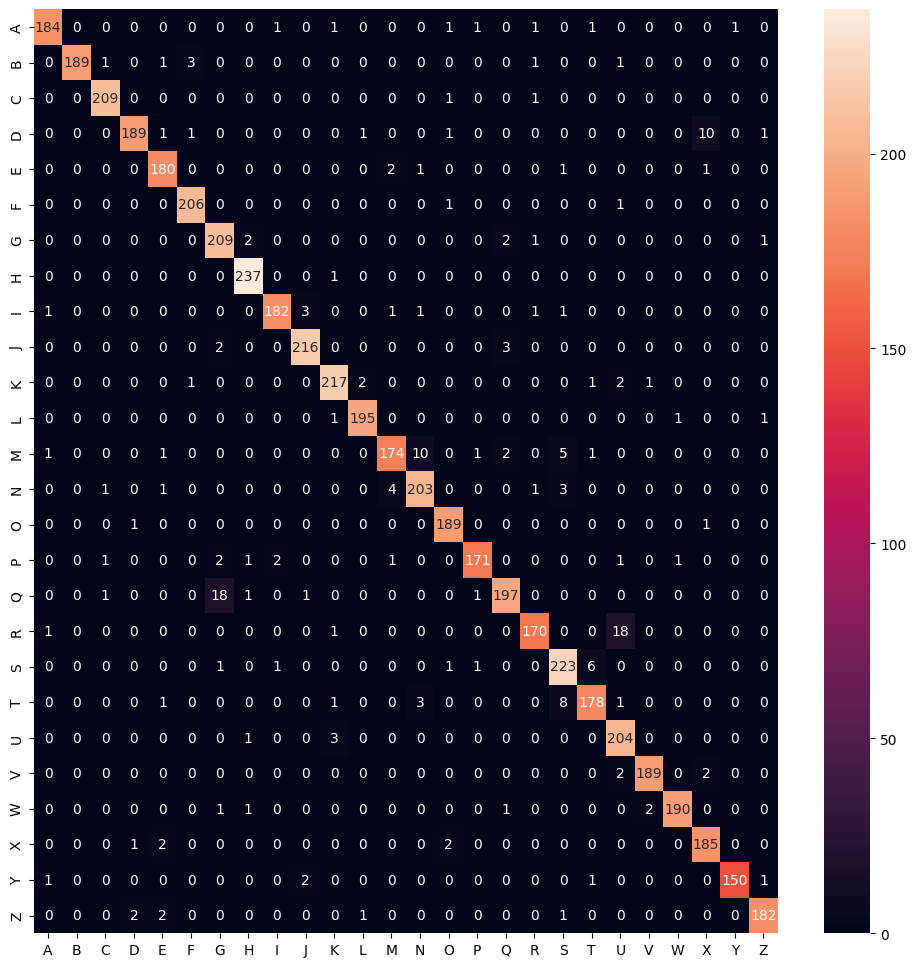

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       191
           1       1.00      0.96      0.98       196
           2       0.98      0.99      0.99       211
           3       0.98      0.93      0.95       204
           4       0.95      0.97      0.96       185
           5       0.98      0.99      0.98       208
           6       0.90      0.97      0.93       215
           7       0.98      1.00      0.99       238
           8       0.98      0.96      0.97       190
           9       0.97      0.98      0.98       221
          10       0.96      0.97      0.97       224
          11       0.98      0.98      0.98       198
          12       0.96      0.89      0.92       195
          13       0.93      0.95      0.94       213
          14       0.96      0.99      0.98       191
          15       0.98      0.95      0.96       180
          16       0.96      0.90      0.93       219
     

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=Labels, columns=Labels)

    fig, ax = plt.subplots(figsize=(12, 12))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [36]:
model = tf.keras.models.load_model(model_save_path)

In [39]:
predict_result = model.predict(np.array([X_test.iloc[10]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 106ms/step
[5.1226625e-08 9.0842181e-01 1.1595457e-03 1.2613094e-05 3.3136246e-06
 4.2489663e-02 4.0309292e-08 2.2997153e-10 8.1336448e-06 6.5373147e-09
 1.3581767e-07 3.1441778e-06 6.0788587e-08 1.3388874e-05 2.7993383e-07
 3.9641411e-05 5.0964813e-06 2.8856727e-04 1.3275132e-05 6.6862989e-19
 4.9079106e-05 1.1117485e-04 4.7379233e-02 1.4844398e-06 2.4610060e-07
 5.1942737e-14]
1


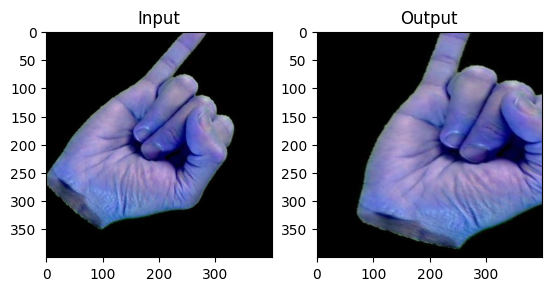

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('/content/i_1_rotate_1.jpeg')
rows, cols, ch = img.shape

pts1 = np.float32([[50, 50],
                   [200, 50],
                   [50, 200]])

pts2 = np.float32([[10, 100],
                   [200, 50],
                   [100, 250]])

M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (cols, rows))

plt.subplot(121)
plt.imshow(img)
plt.title('Input')

plt.subplot(122)
plt.imshow(dst)
plt.title('Output')

plt.show()

In [ ]:
import math

def calculate_angle(P1, P2, P3):
    # Unpack the points
    x1, y1 = P1
    x2, y2 = P2
    x3, y3 = P3

    # Calculate the vectors
    v1 = (x2 - x1, y2 - y1)
    v2 = (x3 - x2, y3 - y2)

    # Dot product of v1 and v2
    dot_product = v1[0] * v2[0] + v1[1] * v2[1]

    # Magnitudes of v1 and v2
    magnitude_v1 = math.sqrt(v1[0]**2 + v1[1]**2)
    magnitude_v2 = math.sqrt(v2[0]**2 + v2[1]**2)

    # Cosine of the angle
    cos_theta = dot_product / (magnitude_v1 * magnitude_v2)

    # Ensure the cosine value is within the valid range [-1, 1] to avoid numerical issues
    cos_theta = max(-1, min(1, cos_theta))

    # Angle in radians
    angle_radians = math.acos(cos_theta)

    # Convert the angle to degrees
    angle_degrees = math.degrees(angle_radians)

    return angle_degrees

# Example usage
P1 = (0.5025054216384888, 0.8101847767829895)
P2 = (0.5997868776321411, 0.754563570022583)
P3 = (0.6518212556838989, 0.65168297290802)

angle = calculate_angle(P1, P2, P3)
result = min(angle,180-angle)
print(f"The angle between P1 and P3 at P2 is {result} degrees.")


The angle between P1 and P3 at P2 is 33.41187932886337 degrees.


In [6]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Example array
data = np.array([[1.0, 2.0, 3.0]])

# Create the StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
scaled_data = scaler.fit_transform(data)

print("Original Data:\n", data)
print("Scaled Data:\n", scaled_data)

Original Data:
 [[1. 2. 3.]]
Scaled Data:
 [[0. 0. 0.]]


In [27]:
import numpy as np
from scipy.spatial.distance import cosine

# Define two points in 2D space
point1 = np.array([14, 3])
point2 = np.array([16, 5])

# Calculate the cosine distance between the points
cosine_distance = cosine(point1, point2)

print(f"Cosine Distance between {point1} and {point2}: {cosine_distance}")


Cosine Distance between [14  3] and [16  5]: 0.004209885785812606


In [29]:
def calculate_slope(point1, point2):
    """
    Calculate the slope of a line given two points in 2D.

    :param point1: A tuple (x1, y1) representing the first point.
    :param point2: A tuple (x2, y2) representing the second point.
    :return: The slope of the line passing through the two points.
    """
    x1, y1 = point1
    x2, y2 = point2

    # Check for vertical line to avoid division by zero
    if x1 == x2:
        raise ValueError("The points have the same x-coordinate; the slope is undefined (vertical line).")

    # Calculate the slope
    slope = (y2 - y1) / (x2 - x1)
    return slope

# Example usage
point1 = (1, 2)
point2 = (3, 6)

try:
    slope = calculate_slope(point1, point2)
    print(type(slope))
    print(f"The slope of the line passing through points {point1} and {point2} is {slope:.2f}")
except ValueError as e:
    print(e)

<class 'float'>
The slope of the line passing through points (1, 2) and (3, 6) is 2.00


In [30]:
import sys

# Get the maximum float value
max_float = sys.float_info.max

print(f"The maximum float value in Python is: {max_float}")

The maximum float value in Python is: 1.7976931348623157e+308


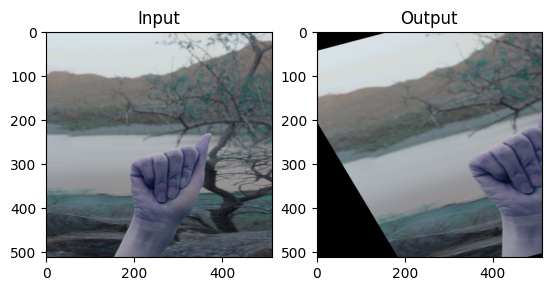

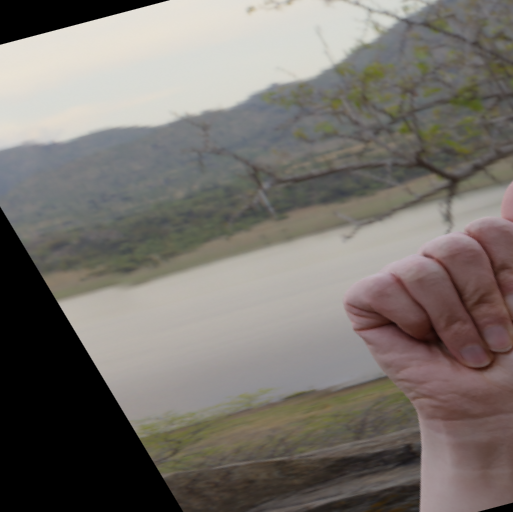

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/5ab760dd-4b3f-4227-8ded-b4ec9ccdbf1f.rgb_0000.png')
rows, cols, ch = img.shape

pts1 = np.float32([[50, 50],
                   [200, 50],
                   [50, 200]])

pts2 = np.float32([[10, 100],
                   [200, 50],
                   [100, 250]])

M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (cols, rows))

plt.subplot(121)
plt.imshow(img)
plt.title('Input')

plt.subplot(122)
plt.imshow(dst)
plt.title('Output')

plt.show()

cv2_imshow(dst)